In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("/content/train.csv")

In [5]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [6]:
df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [7]:
df.shape

(30000, 24)

In [8]:
df.isnull().sum()

,0
Customer ID,0
Name,0
Gender,53
Age,0
Income (USD),4576
Income Stability,1683
Profession,0
Type of Employment,7270
Location,0
Loan Amount Request (USD),0


In [9]:
df.replace(-999, np.nan, inplace=True)

In [10]:
df.isnull().sum()

,0
Customer ID,0
Name,0
Gender,53
Age,0
Income (USD),4576
Income Stability,1683
Profession,0
Type of Employment,7270
Location,0
Loan Amount Request (USD),0


In [11]:
df=df.replace([" ","",-999],np.nan)

In [12]:
nums_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()
binary_cols=[col for col in df.columns if df[col].nunique()==2]
print("Binary columns:",binary_cols)
num_cols=[col for col in nums_cols if col not in binary_cols]
print("Numerical columns:",num_cols)
cat_cols=[col for col in cat_cols if col not in binary_cols]
print("Categorical columns:",cat_cols)

Binary columns: ['Gender', 'Income Stability', 'Expense Type 1', 'Expense Type 2', 'No. of Defaults', 'Co-Applicant']
Numerical columns: ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'Property ID', 'Property Age', 'Property Type', 'Property Price', 'Loan Sanction Amount (USD)']
Categorical columns: ['Customer ID', 'Name', 'Profession', 'Type of Employment', 'Location', 'Has Active Credit Card', 'Property Location']


In [13]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [14]:
for col in cat_cols:
  df[col]=df[col].fillna("Unknown")

In [15]:
print(df)

      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56      1933.050   
1         C-33999  America Calderone      M   32      4952.910   
2          C-3770      Rosetta Verne      F   65       988.190   
3         C-26480         Zoe Chitty      F   65      2222.435   
4         C-23459       Afton Venema      F   31      2614.770   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38      4969.410   
29996     C-32511       Silas Slaugh      M   20      1606.880   
29997      C-5192       Carmelo Lone      F   49      2222.435   
29998     C-12172      Carolann Osby      M   38      2417.710   
29999     C-33003  Bridget Garibaldi      F   63      3068.240   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working                Unkno

In [16]:
for col in binary_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [17]:
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,Unknown,746,1933.05,4,Rural,1.0,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.910,Low,Working,Unknown,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1.0,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.190,High,Pensioner,Unknown,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0.0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,2222.435,High,Pensioner,Unknown,Rural,80057.92,...,832.70,1,Unpossessed,890,2223.25,2,Semi-Urban,1.0,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1.0,208567.91,74008.28


In [18]:
df.isnull().sum()

,0
Customer ID,0
Name,0
Gender,0
Age,0
Income (USD),0
Income Stability,0
Profession,0
Type of Employment,0
Location,0
Loan Amount Request (USD),0


In [19]:
y = df["Loan Sanction Amount (USD)"]
X = df.drop(columns=["Loan Sanction Amount (USD)"])


In [20]:
X.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-36995,Frederica Shealy,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,...,3.0,809.44,0,Unknown,746,1933.05,4,Rural,1.0,119933.46
1,C-33999,America Calderone,M,32,4952.910,Low,Working,Unknown,Semi-Urban,46837.47,...,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1.0,54791.00
2,C-3770,Rosetta Verne,F,65,988.190,High,Pensioner,Unknown,Semi-Urban,45593.04,...,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0.0,72440.58
3,C-26480,Zoe Chitty,F,65,2222.435,High,Pensioner,Unknown,Rural,80057.92,...,2.0,832.70,1,Unpossessed,890,2223.25,2,Semi-Urban,1.0,121441.51
4,C-23459,Afton Venema,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,2.0,745.55,1,Active,715,2614.77,4,Semi-Urban,1.0,208567.91


In [21]:
y.head()

,Loan Sanction Amount (USD)
0,54607.18
1,37469.98
2,36474.43
3,56040.54
4,74008.28


In [22]:
from sklearn.preprocessing import StandardScaler
train_num_cols = [col for col in num_cols if col != "Loan Sanction Amount (USD)"]
X_num=df[train_num_cols]
scaler = StandardScaler()
X_std = scaler.fit_transform(X_num)


In [23]:
from sklearn.preprocessing import LabelEncoder

binary_encoders = {}

for col in binary_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    binary_encoders[col] = le


In [24]:
drop_cols = ['Customer ID', 'Name']
X = X.drop(columns=drop_cols, errors='ignore')


In [25]:
from sklearn.preprocessing import OneHotEncoder
train_cat_cols=[col for col in cat_cols if col not in ['Customer ID', 'Name']]
X_cat=df[train_cat_cols]
encoder = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False
)

X_cat_encoded = encoder.fit_transform(X_cat)


In [26]:
cat_feature_names = encoder.get_feature_names_out([col for col in cat_cols if col not in ['Customer ID', 'Name']])

X_cat_encoded = pd.DataFrame(
    X_cat_encoded,
    columns=cat_feature_names,
    index=X.index
)


In [27]:
X_num_scaled = pd.DataFrame(
    X_std,
    columns=X_num.columns,
    index=X.index
)


In [28]:
X_final = pd.concat(
    [
        X[binary_cols],
        X_num_scaled,
        X_cat_encoded
    ],
    axis=1
)


In [29]:
X_final.head()

,Gender,Income Stability,Expense Type 1,Expense Type 2,No. of Defaults,Co-Applicant,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),...,Location_Semi-Urban,Location_Urban,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unknown,Has Active Credit Card_Unpossessed,Property Location_Rural,Property Location_Semi-Urban,Property Location_Unknown,Property Location_Urban
0,0,1,0,0,0,1,0.991451,-0.061266,-0.269027,-0.775232,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1,0,1,0,1,-0.504355,0.229972,-0.705269,0.401386,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,0,0,1,0,0,1.552379,-0.152389,-0.726171,-1.094549,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0,0,1,1,1,1.552379,-0.033357,-0.147279,-0.509820,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0,1,0,1,1,1,-0.566680,0.004480,0.420461,0.381062,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
y_final=scaler.fit_transform(y.to_frame())

In [31]:
y.head()

,Loan Sanction Amount (USD)
0,54607.18
1,37469.98
2,36474.43
3,56040.54
4,74008.28


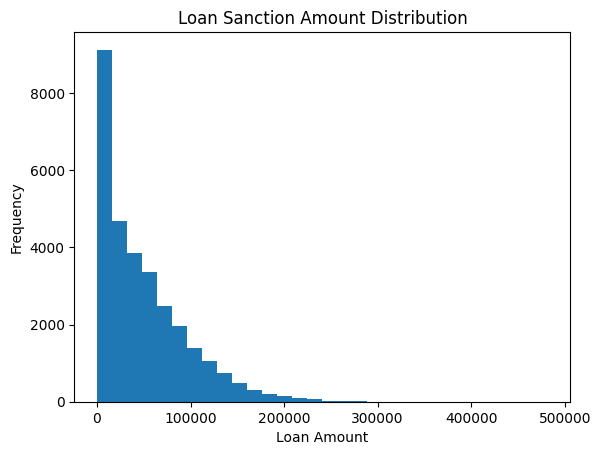

In [32]:
plt.hist(y, bins=30)
plt.title("Loan Sanction Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()


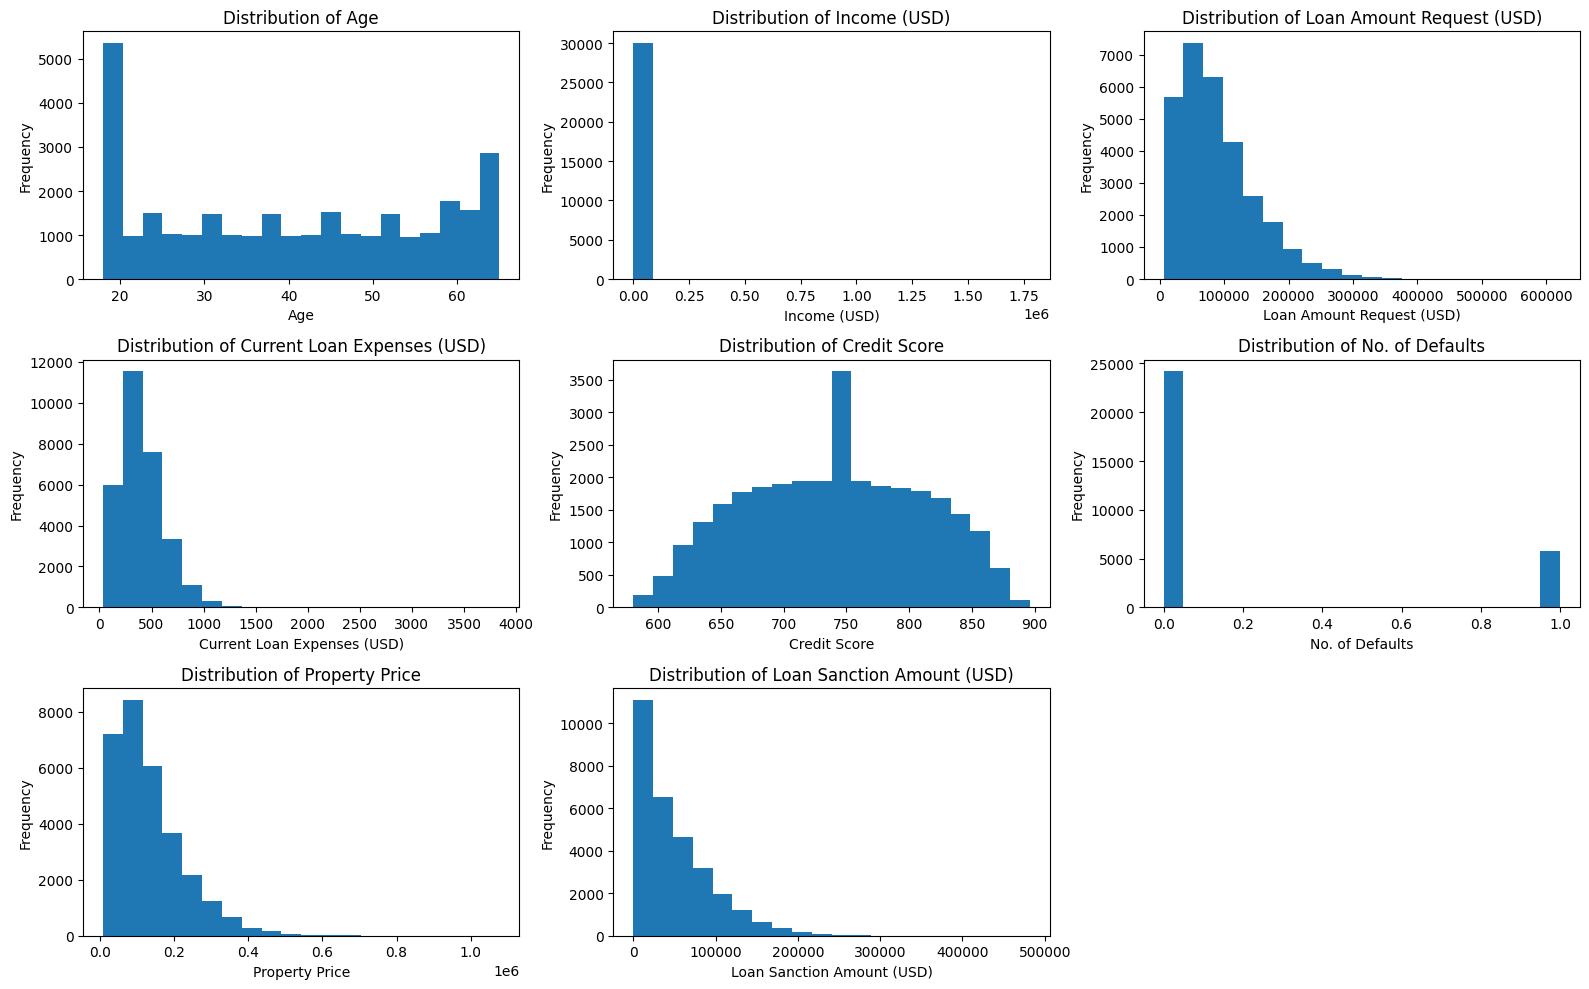

In [33]:
import matplotlib.pyplot as plt

# Select important numerical features
features = [
    "Age",
    "Income (USD)",
    "Loan Amount Request (USD)",
    "Current Loan Expenses (USD)",
    "Credit Score",
    "No. of Defaults",
    "Property Price",
    "Loan Sanction Amount (USD)"
]

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature].dropna(), bins=20)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


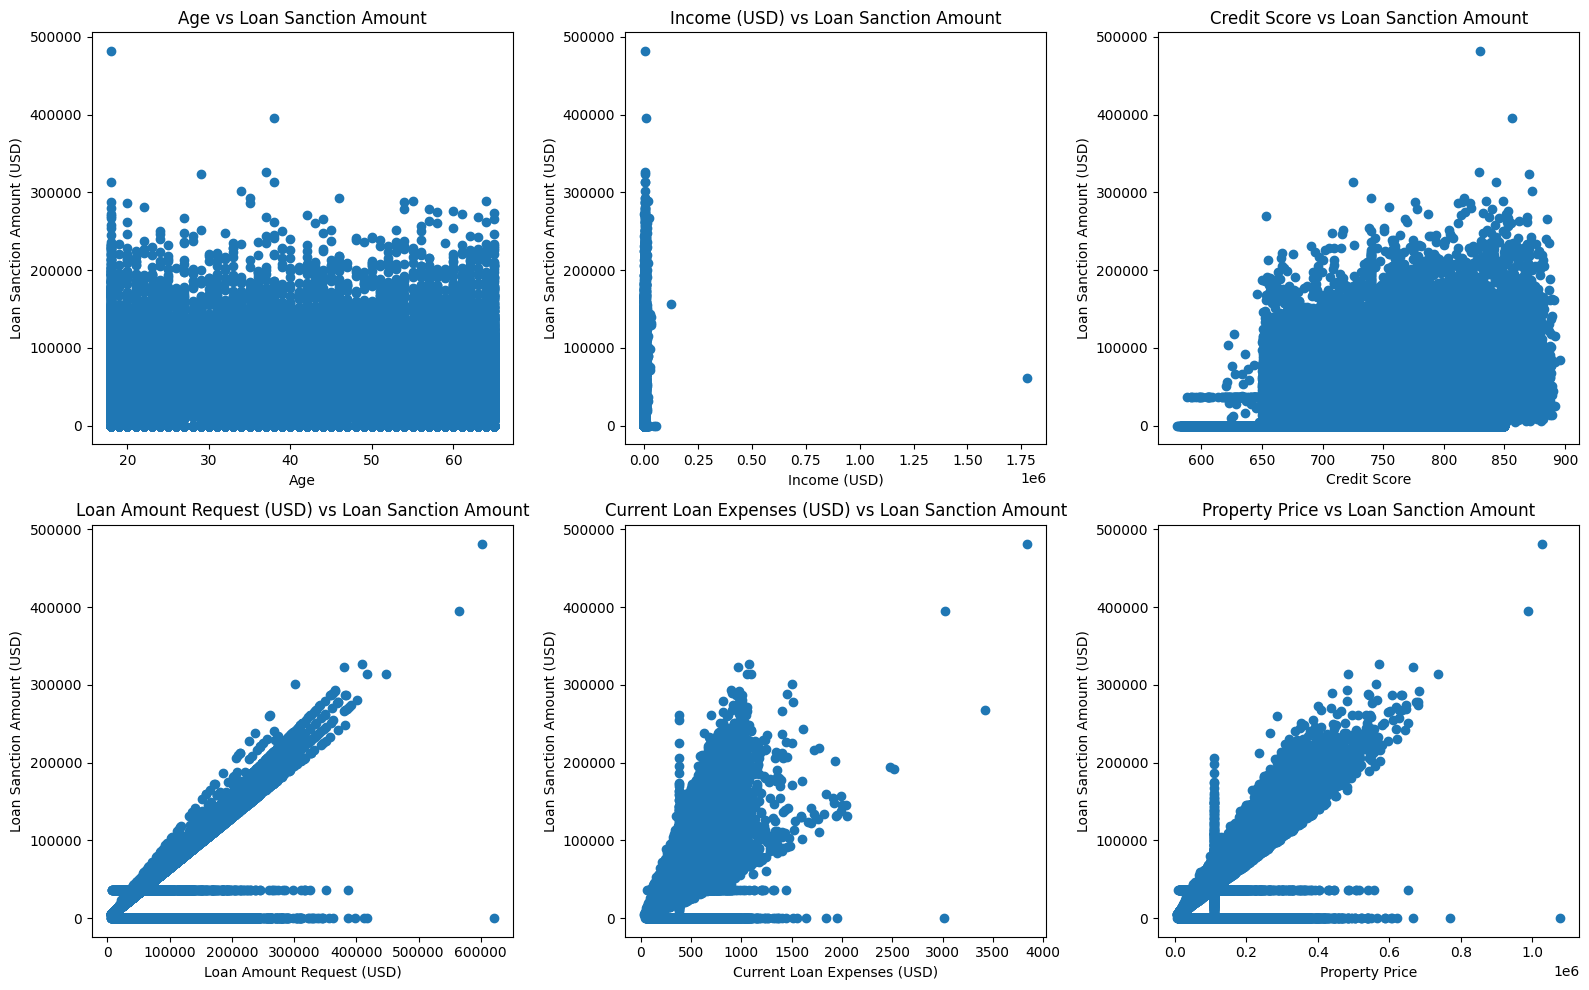

In [34]:
features = [
    "Age",
    "Income (USD)",
    "Credit Score",
    "Loan Amount Request (USD)",
    "Current Loan Expenses (USD)",
    "Property Price"
]

plt.figure(figsize=(16, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.scatter(
        df[feature],
        df["Loan Sanction Amount (USD)"]
    )
    plt.xlabel(feature)
    plt.ylabel("Loan Sanction Amount (USD)")
    plt.title(f"{feature} vs Loan Sanction Amount")

plt.tight_layout()
plt.show()


In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.2,random_state=42)

In [36]:


start = time.time()

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

linear_training_time = time.time() - start

linear_cv_scores = cross_val_score(
    linear_model,
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print("Linear Regression Mean CV R2 Score:", np.mean(linear_cv_scores))
print("Linear Regression Training Time:", linear_training_time)


Linear Regression Mean CV R2 Score: 0.639349296823535
Linear Regression Training Time: 0.10270810127258301


In [37]:


models = {
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(max_iter=5000),
    "Elastic Net": ElasticNet(max_iter=5000)
}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start

    cv_score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="r2"
    ).mean()

    print(f"{name} - CV R2 Score: {cv_score}")
    print(f"{name} - Training Time: {training_time}\n")


Ridge Regression - CV R2 Score: 0.6393538863091953
Ridge Regression - Training Time: 0.10766768455505371

Lasso Regression - CV R2 Score: -7.278907622656483e-05
Lasso Regression - Training Time: 0.024806737899780273

Elastic Net - CV R2 Score: 0.21367665766932403
Elastic Net - Training Time: 0.028429269790649414



In [38]:
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()

ridge_cv = GridSearchCV(
    ridge, ridge_params,
    cv=5, scoring="r2"
)
ridge_cv.fit(X_train, y_train)

ridge_best_score = ridge_cv.best_score_
print("Ridge best score: ",ridge_best_score)

Ridge best score:  0.6393538863091953


In [39]:
lasso_params = {"alpha": [0.001, 0.01, 0.1, 1, 10]}
lasso = Lasso(max_iter=5000)

lasso_cv = GridSearchCV(
    lasso, lasso_params,
    cv=5, scoring="r2"
)
lasso_cv.fit(X_train, y_train)

lasso_best_score = lasso_cv.best_score_
print("Lasso best score: ",lasso_best_score)

Lasso best score:  0.6394996117057762


In [40]:
elastic_params = {
    "alpha": [0.01, 0.1, 1, 10],
    "l1_ratio": [0.2, 0.5, 0.8]
}

elastic = ElasticNet(max_iter=5000)

elastic_cv = GridSearchCV(
    elastic, elastic_params,
    cv=5, scoring="r2"
)
elastic_cv.fit(X_train, y_train)

elastic_best_score = elastic_cv.best_score_
print("Elastic net best score: ",elastic_best_score)



Elastic net best score:  0.6385193386265753


In [41]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": linear_model,
    "Ridge Regression": ridge_cv.best_estimator_,
    "Lasso Regression": lasso_cv.best_estimator_,
    "Elastic Net": elastic_cv.best_estimator_
}

print("Model Evaluation Results:\n")

for name, model in models.items():
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"{name}")
    print(f"R2 Score : {r2}")
    print(f"MAE      : {mae}")
    print(f"MSE      : {mse}")
    print(f"RMSE     : {rmse}\n")


Model Evaluation Results:

Linear Regression
R2 Score : 0.6065911676106808
MAE      : 0.40362735481605233
MSE      : 0.3928799676541731
RMSE     : 0.6268013781527392

Ridge Regression
R2 Score : 0.6071007183605297
MAE      : 0.4036118544207892
MSE      : 0.3923711019001865
RMSE     : 0.6263953239769486

Lasso Regression
R2 Score : 0.6423650669831529
MAE      : 0.402022493149573
MSE      : 0.3571541596112776
RMSE     : 0.5976237609159107

Elastic Net
R2 Score : 0.6498901083861295
MAE      : 0.4018420611545537
MSE      : 0.34963923422172244
RMSE     : 0.5913029969666334



In [42]:
import pandas as pd

tuning_summary = pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression", "Elastic Net Regression"],
    "Search Method": ["Grid Search", "Grid Search", "Grid Search"],
    "Best Parameters": [
        ridge_cv.best_params_,
        lasso_cv.best_params_,
        elastic_cv.best_params_
    ],
    "Best CV R2": [
        ridge_cv.best_score_,
        lasso_cv.best_score_,
        elastic_cv.best_score_
    ]
})

print("Table 1: Hyperparameter Tuning Summary")
tuning_summary


Table 1: Hyperparameter Tuning Summary


,Model,Search Method,Best Parameters,Best CV R2
0,Ridge Regression,Grid Search,{'alpha': 1},0.639354
1,Lasso Regression,Grid Search,{'alpha': 0.001},0.639500
2,Elastic Net Regression,Grid Search,"{'alpha': 0.01, 'l1_ratio': 0.2}",0.638519


In [43]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def cv_metrics(model, X, y):
    y_pred = cross_val_predict(model, X, y, cv=5)
    return {
        "MAE": mean_absolute_error(y, y_pred),
        "MSE": mean_squared_error(y, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y, y_pred)),
        "R2": r2_score(y, y_pred)
    }

cv_results = pd.DataFrame.from_dict({
    "Linear Regression": cv_metrics(linear_model, X_train, y_train),
    "Ridge Regression": cv_metrics(ridge_cv.best_estimator_, X_train, y_train),
    "Lasso Regression": cv_metrics(lasso_cv.best_estimator_, X_train, y_train),
    "Elastic Net Regression": cv_metrics(elastic_cv.best_estimator_, X_train, y_train)
}, orient="index")

print("Table 2: Cross-Validation Performance (K=5)")
cv_results


Table 2: Cross-Validation Performance (K=5)


,MAE,MSE,RMSE,R2
Linear Regression,0.406995,0.360912,0.600759,0.639209
Ridge Regression,0.406944,0.360907,0.600756,0.639214
Lasso Regression,0.406525,0.360760,0.600633,0.639361
Elastic Net Regression,0.407965,0.361739,0.601447,0.638383


In [44]:
def test_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2": r2_score(y_test, y_pred)
    }

test_results = pd.DataFrame.from_dict({
    "Linear Regression": test_metrics(linear_model, X_test, y_test),
    "Ridge Regression": test_metrics(ridge_cv.best_estimator_, X_test, y_test),
    "Lasso Regression": test_metrics(lasso_cv.best_estimator_, X_test, y_test),
    "Elastic Net Regression": test_metrics(elastic_cv.best_estimator_, X_test, y_test)
}, orient="index")

print("Table 3: Test Set Performance")
test_results


Table 3: Test Set Performance


,MAE,MSE,RMSE,R2
Linear Regression,0.403627,0.392880,0.626801,0.606591
Ridge Regression,0.403612,0.392371,0.626395,0.607101
Lasso Regression,0.402022,0.357154,0.597624,0.642365
Elastic Net Regression,0.401842,0.349639,0.591303,0.649890


In [45]:
coef_comparison = pd.DataFrame({
    "Feature": X_train.columns,
    "Linear": linear_model.coef_.ravel(),
    "Ridge": ridge_cv.best_estimator_.coef_.ravel(),
    "Lasso": lasso_cv.best_estimator_.coef_.ravel(),
    "Elastic Net": elastic_cv.best_estimator_.coef_.ravel()
})


print("Table 4: Coefficient Comparison")
coef_comparison.head()


Table 4: Coefficient Comparison


,Feature,Linear,Ridge,Lasso,Elastic Net
0,Gender,-0.010987,-0.010990,-0.007173,-0.002832
1,Income Stability,0.215907,0.211147,0.000000,-0.000000
2,Expense Type 1,0.010366,0.010462,0.002479,0.000000
3,Expense Type 2,0.009942,0.009971,0.006402,0.002727
4,No. of Defaults,-0.047754,-0.047811,-0.041310,-0.031301


In [46]:
models = {
    "Linear": linear_model,
    "Ridge": ridge_cv.best_estimator_,
    "Lasso": lasso_cv.best_estimator_,
    "Elastic Net": elastic_cv.best_estimator_
}


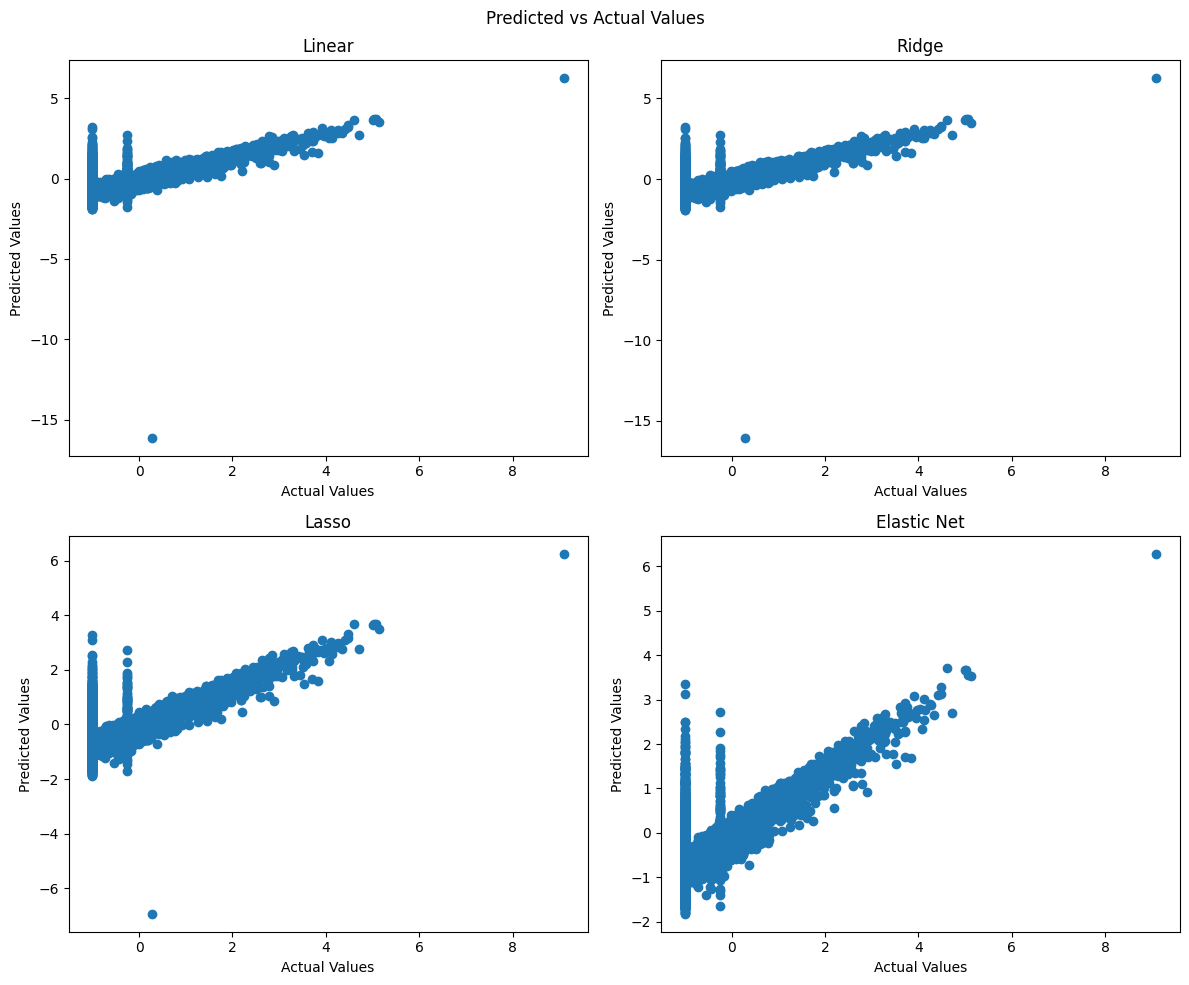

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test).ravel()
    y_true = y_test.ravel()   # ✅ FIX

    ax.scatter(y_true, y_pred)
    ax.set_title(name)
    ax.set_xlabel("Actual Values")
    ax.set_ylabel("Predicted Values")

plt.suptitle("Predicted vs Actual Values")
plt.tight_layout()
plt.show()


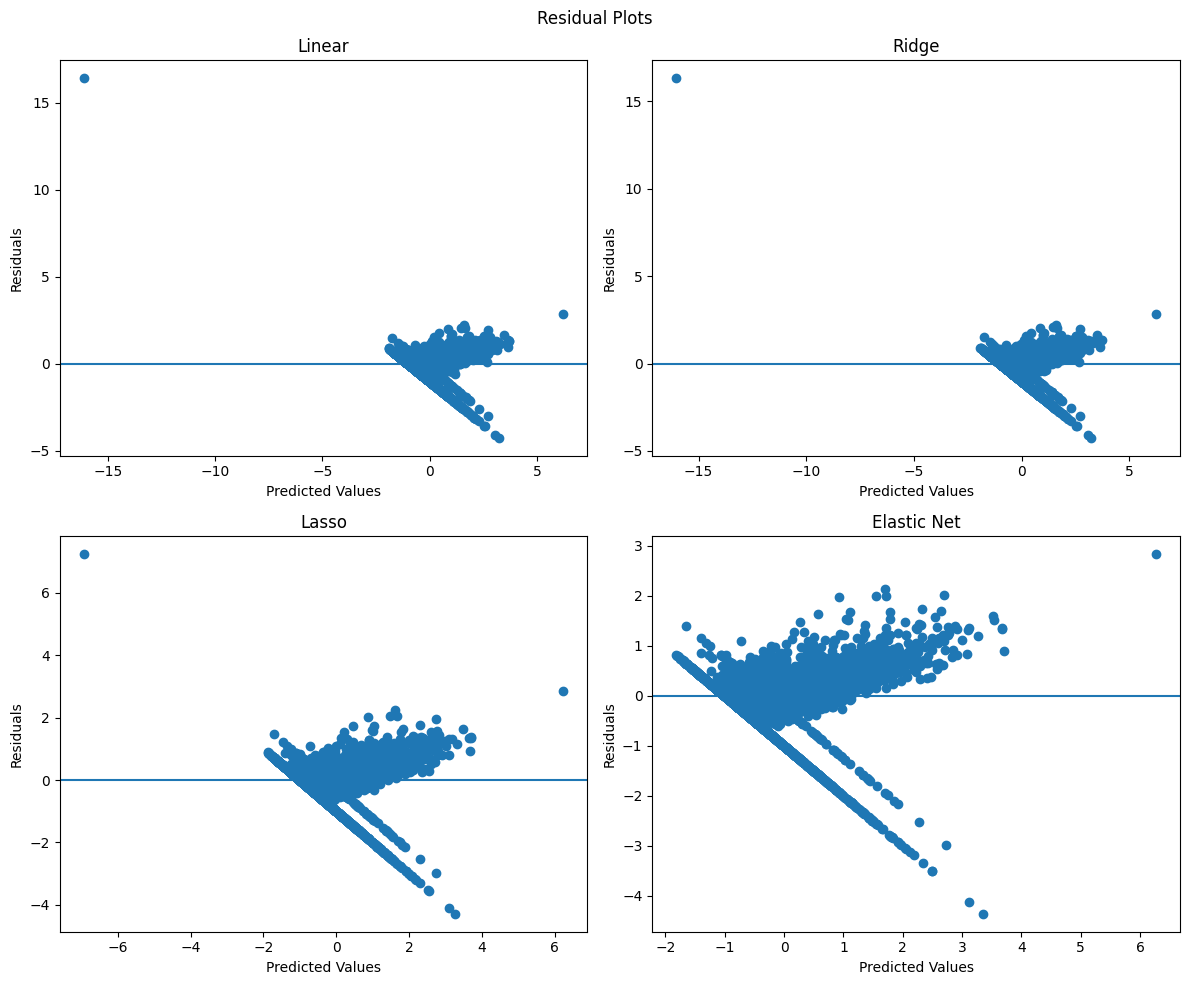

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test).ravel()
    y_true = y_test.ravel()

    residuals = y_true - y_pred

    ax.scatter(y_pred, residuals)
    ax.axhline(0)
    ax.set_title(name)
    ax.set_xlabel("Predicted Values")
    ax.set_ylabel("Residuals")

plt.suptitle("Residual Plots")
plt.tight_layout()
plt.show()


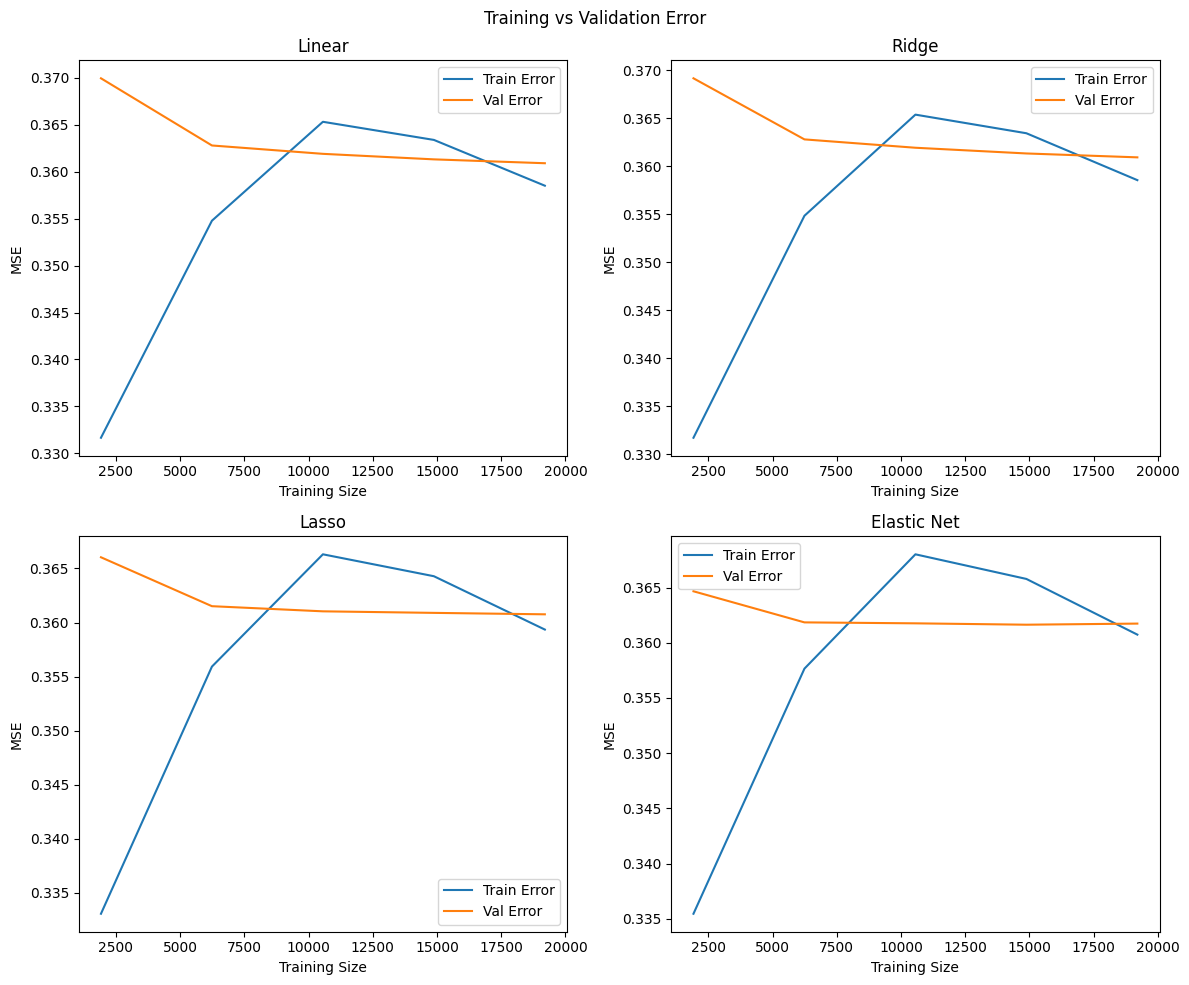

In [49]:
from sklearn.model_selection import learning_curve
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    train_sizes, train_scores, val_scores = learning_curve(
        model,
        X_train,
        y_train,
        cv=5,
        scoring="neg_mean_squared_error"
    )

    train_error = -np.mean(train_scores, axis=1)
    val_error = -np.mean(val_scores, axis=1)

    ax.plot(train_sizes, train_error, label="Train Error")
    ax.plot(train_sizes, val_error, label="Val Error")
    ax.set_title(name)
    ax.set_xlabel("Training Size")
    ax.set_ylabel("MSE")
    ax.legend()

plt.suptitle("Training vs Validation Error")
plt.tight_layout()
plt.show()


/tmp/ipython-input-156664007.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X_train.columns, rotation=90)
/tmp/ipython-input-156664007.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X_train.columns, rotation=90)
/tmp/ipython-input-156664007.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X_train.columns, rotation=90)
/tmp/ipython-input-156664007.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(X_train.columns, rotation=90)


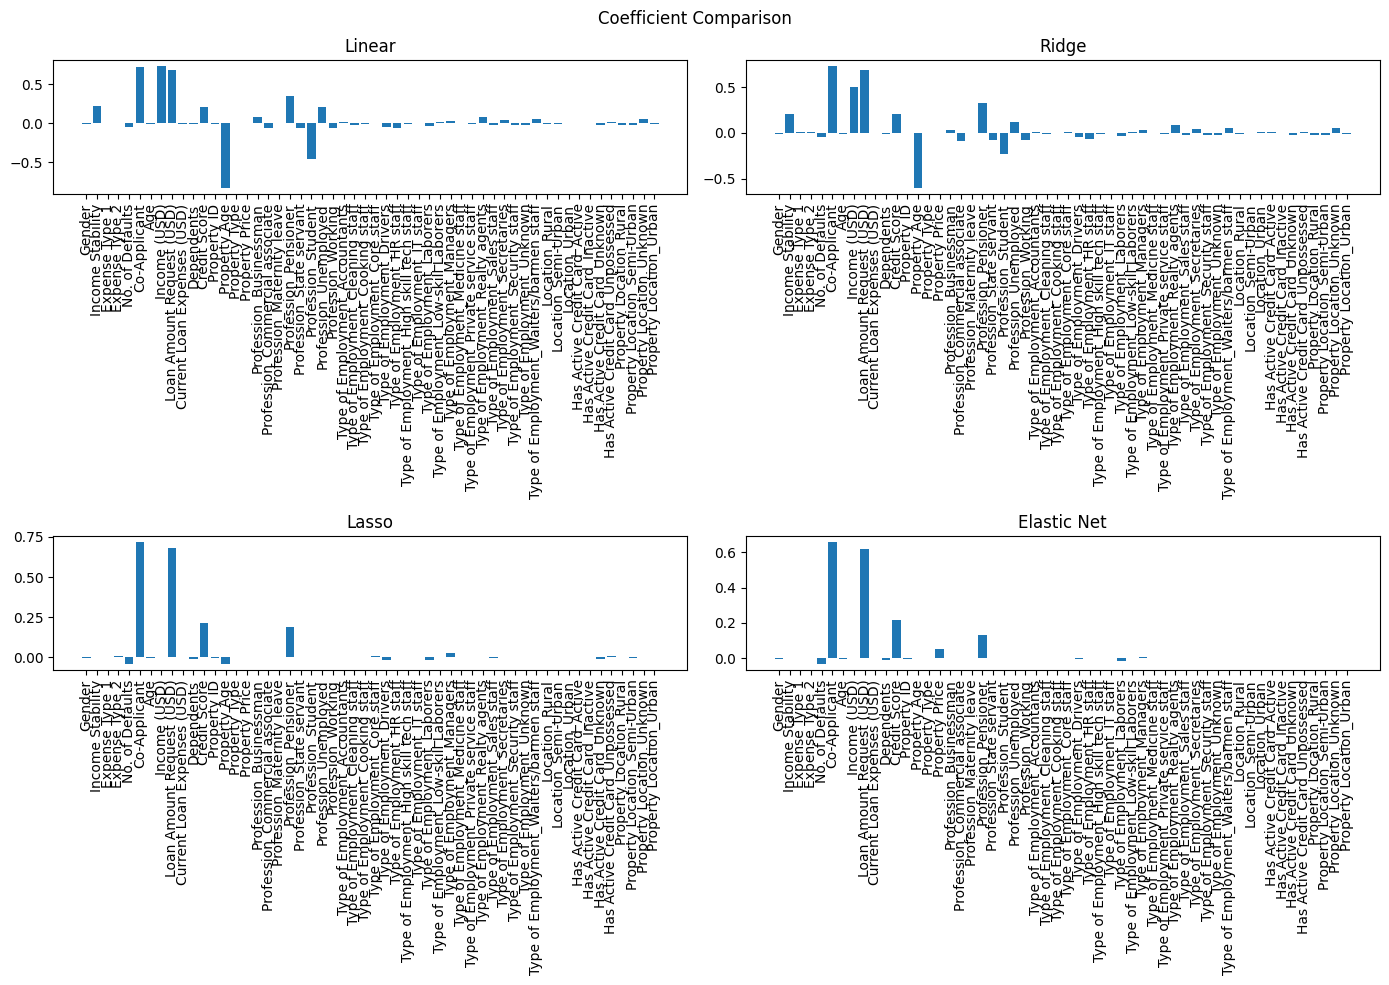

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for ax, (name, model) in zip(axes, models.items()):
    ax.bar(X_train.columns, model.coef_.ravel())
    ax.set_title(name)
    ax.set_xticklabels(X_train.columns, rotation=90)

plt.suptitle("Coefficient Comparison")
plt.tight_layout()
plt.show()
